In [81]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [82]:
import matplotlib.pyplot as plt



In [95]:
Xtrain = np.insert(Xtrain, 32, values=1, axis=1)

In [84]:
import math
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
tr = scipy.io.loadmat('spam_data.mat')

In [93]:
Xtrain=tr["training_data"]
Ytrain=tr["training_labels"][0]
Xtest=tr["test_data"]

In [94]:
#Pre-Pro (iii)
for i in range(0,5172):
    for j in range(0,32):
        if Xtrain[i][j]>0:
            Xtrain[i][j]=1
        else:
            Xtrain[i][j]=0

In [87]:
def logistic(x):
    return 1/(1 + np.exp(-x))

In [88]:
def risk(a,kern,X,Y):
    risk_f=0
    for i in range(0,len(X)):
        #wx=w.transpose().dot(X[i])
        Ka=a.dot(kern[i])
        sig=logistic(Ka)
        if sig==1:
            sig=0.99999995
        if sig==0:
            sig=0.00000005
        risk_f+=-(Y[i]*np.log(sig)+(1-Y[i])*np.log(1-sig))
    return risk_f

In [176]:
def kernel_ridge(X,Y):
    a=np.zeros(len(X))
    a[0]=1
    #a=np.random.rand
    rho=0.1
    lamb=0.0001
    kern=kern_matrix(X,X,rho)
    #maxiter=1000
    eps=0.000001
    risk_fn=np.zeros(len(X)/50+1,dtype='float')
    for i in range(len(X)):
        Ka=a.dot(kern[i])
        #sig=logistic(Ka)
        #if sig==1:
        #    sig=0.99999995
        #if sig==0:
        #    sig=0.00000005
        if i%50 ==0:
            j=int(i/50)
            #risk_fn[j]=risk(w,X,Y)
            risk_fn[j]=risk(a,kern,X,Y)
        a=a+eps*(Y[i]-logistic(Ka))-lamb*a
        print("at iter",i)
        print("Risk fn value=",risk_fn[j])
        print("dual weights are",a)
    return risk_fn,a    

In [142]:
def kern_matrix(X,Z,rho):
    kern_mat=np.zeros(shape=(len(X),len(Z)))
    for i in range(len(X)):
        for j in range(len(Z)):
            kern_mat[i][j]=k(X[i],Z[j],rho)
    return kern_mat        

In [156]:
Xtraining=Xtrain[0:3448]
Ytraining=Ytrain[0:3448]
Xvalid=Xtrain[3448:]
Yvalid=Ytrain[3448:]

In [175]:
def k(x,z,rho):
    kern=x.transpose().dot(z)+rho
    return kern*kern

In [155]:
from sklearn.utils import shuffle
Xtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=0)

In [177]:
risk_func,weights=kernel_ridge(Xtraining,Ytraining)

at iter 0
Risk fn value= 5179.60010451
dual weights are [  9.99899012e-01  -9.87990796e-07  -9.87990796e-07 ...,  -9.87990796e-07
  -9.87990796e-07  -9.87990796e-07]
at iter 1
Risk fn value= 5179.60010451
dual weights are [  9.99798254e-01  -1.75607827e-06  -1.75607827e-06 ...,  -1.75607827e-06
  -1.75607827e-06  -1.75607827e-06]
at iter 2
Risk fn value= 5179.60010451
dual weights are [  9.99697509e-01  -2.52122639e-06  -2.52122639e-06 ...,  -2.52122639e-06
  -2.52122639e-06  -2.52122639e-06]
at iter 3
Risk fn value= 5179.60010451
dual weights are [  9.99597772e-01  -2.28817415e-06  -2.28817415e-06 ...,  -2.28817415e-06
  -2.28817415e-06  -2.28817415e-06]
at iter 4
Risk fn value= 5179.60010451
dual weights are [  9.99497045e-01  -3.05481496e-06  -3.05481496e-06 ...,  -3.05481496e-06
  -3.05481496e-06  -3.05481496e-06]
at iter 5
Risk fn value= 5179.60010451
dual weights are [  9.99397332e-01  -2.81829772e-06  -2.81829772e-06 ...,  -2.81829772e-06
  -2.81829772e-06  -2.81829772e-06]
at i

/Users/agrimabahl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [33]:
def predict(a,Xtrain, Xvalid):
    pred_values=np.zeros(len(Xvalid))
    kern=kern_matrix(Xvalid,Xtrain,1)
    for i in range(len(Xvalid)):
        Ka=a.dot(kern[i])
        pred=logistic(Ka)
        if pred<=0.5:
            pred_values[i]=0
        else:
            pred_values[i]=1
    return pred_values   

In [167]:
pred_val=predict(weights, Xtraining, Xvalid)

In [35]:
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices

In [168]:
benchmark(np.array(pred_val),np.array(Yvalid))

(0.38399071925754058,
 (array([   2,    7,   12,   14,   15,   17,   18,   19,   20,   21,   25,
           27,   34,   35,   36,   45,   47,   48,   51,   53,   60,   61,
           63,   67,   68,   73,   75,   78,   79,   82,   93,   96,   97,
          106,  113,  115,  119,  121,  123,  124,  125,  128,  130,  131,
          135,  137,  139,  140,  141,  143,  148,  150,  159,  160,  163,
          164,  165,  167,  169,  172,  175,  177,  180,  182,  184,  187,
          189,  190,  191,  194,  197,  198,  199,  200,  202,  209,  211,
          212,  213,  214,  215,  216,  219,  225,  227,  232,  236,  237,
          238,  239,  243,  245,  246,  247,  248,  249,  250,  251,  255,
          258,  263,  264,  273,  274,  275,  278,  280,  283,  286,  288,
          289,  294,  295,  297,  299,  301,  302,  305,  309,  310,  311,
          312,  316,  318,  320,  324,  325,  334,  335,  337,  342,  345,
          347,  348,  350,  352,  358,  359,  360,  362,  364,  367,  370,
   

In [152]:
max_iter=[100,200,500,1000,2000,3000,3448]

In [169]:
training_error[6]=0.27262180974477956
training_error[0]=0.46113689095127608
training_error[1]=0.44025522041763343
training_error[2]=0.46055684454756379
training_error[3]=0.38399071925754058
training_error[4]=0.3248259860788863
training_error[5]=0.30162412993039445

In [150]:
quad_training_error=[0]*7
quad_training_error[6]=0.37703016241299303
quad_training_error[5]=0.37703016241299303
quad_training_error[4]=0.37703016241299303
quad_training_error[3]=0.47563805104408352
quad_training_error[2]=0.68387470997679811
quad_training_error[1]=0.68387470997679811
quad_training_error[0]=0.72737819025522044

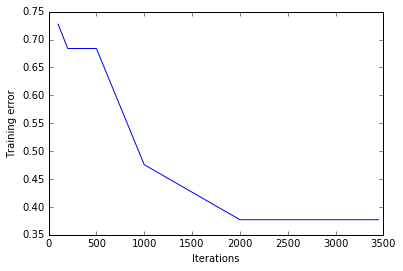

In [153]:
plt.plot(max_iter,quad_training_error)
plt.ylabel('Training error')
plt.xlabel('Iterations')
plt.show()

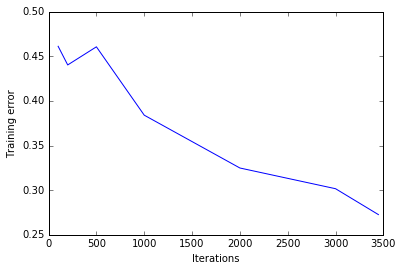

In [170]:
plt.plot(max_iter,training_error)
plt.ylabel('Training error')
plt.xlabel('Iterations')
plt.show()

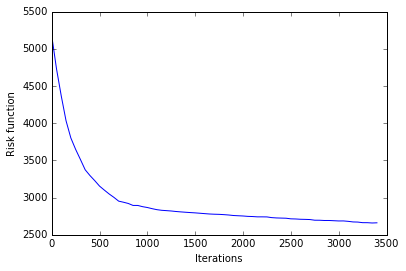

In [178]:
x = [i*50 for i in range(len(risk_func))]
plt.plot(x,risk_func)
plt.ylabel('Risk function')
plt.xlabel('Iterations')
plt.show()